In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
from matplotlib.lines import Line2D
from sklearn.metrics import r2_score
import os
import sys
module_path = os.path.abspath(os.path.join('../..'))
if module_path not in sys.path:
    sys.path.append(module_path)

from src.utils import combine_prediction_files, compute_network_avg_prediction
from src import plotting #import r2_boxplots

# Load splits

In [2]:
magdir = '/uufs/chpc.utah.edu/common/home/koper-group3/alysha/magnitudes'
p_test_df = pd.read_csv(os.path.join(magdir, 'feature_splits', 'p.test.csv'))
p_2023_df = pd.read_csv(os.path.join(magdir, 'feature_splits','p.20230101.csv'))
s_test_df = pd.read_csv(os.path.join(magdir, 'feature_splits','s.test.csv'))
s_2023_df = pd.read_csv(os.path.join(magdir, 'feature_splits','s.20230101.csv'))
p_train_df = pd.read_csv(os.path.join(magdir, 'feature_splits', 'p.train.csv'))
s_train_df = pd.read_csv(os.path.join(magdir, 'feature_splits','s.train.csv'))

In [3]:
p_test_evids = p_test_df['Evid'].unique()
p_2023_evids = p_2023_df['Evid'].unique()
s_test_evids = s_test_df['Evid'].unique()
s_2023_evids = s_2023_df['Evid'].unique()
p_train_evids = p_train_df['Evid'].unique()
s_train_evids = s_train_df['Evid'].unique()

# Load YP21 catalogs

In [ ]:
ypml_amps = pd.read_csv(f'../../data/catalogs/yellowstone.amps.ypml-v5.2024.csv')

# Load predictions and results

In [5]:
allfeatdir = "all_features_constHP"
selectedfeatdir = "selected_features_constHP"
summfilename = 'all.stat.results.csv'
p_resultsdir = os.path.join(magdir, 'p_models')
s_resultsdir = os.path.join(magdir, 's_models')

In [6]:
p_sub_results = pd.read_csv(os.path.join(p_resultsdir, selectedfeatdir, summfilename))
s_sub_results = pd.read_csv(os.path.join(s_resultsdir, selectedfeatdir, summfilename))

p_all_results = pd.read_csv(os.path.join(p_resultsdir, allfeatdir, summfilename))
s_all_results = pd.read_csv(os.path.join(s_resultsdir, allfeatdir, summfilename))

In [7]:
p_stats = p_test_df.station.unique()
p_sub_test_preds = combine_prediction_files(p_stats,
                                            os.path.join(p_resultsdir, selectedfeatdir),
                                            'P',
                                            'test')

p_sub_2023_preds = combine_prediction_files(p_stats,
                                            os.path.join(p_resultsdir, selectedfeatdir),
                                            'P',
                                            'holdout')

/uufs/chpc.utah.edu/common/home/koper-group3/alysha/magnitudes/p_models/selected_features_constHP/B207.P.preds.holdout.csv does not exist, skipping...
/uufs/chpc.utah.edu/common/home/koper-group3/alysha/magnitudes/p_models/selected_features_constHP/H17A.P.preds.holdout.csv does not exist, skipping...
/uufs/chpc.utah.edu/common/home/koper-group3/alysha/magnitudes/p_models/selected_features_constHP/B208.P.preds.holdout.csv does not exist, skipping...
/uufs/chpc.utah.edu/common/home/koper-group3/alysha/magnitudes/p_models/selected_features_constHP/B944.P.preds.holdout.csv does not exist, skipping...
/uufs/chpc.utah.edu/common/home/koper-group3/alysha/magnitudes/p_models/selected_features_constHP/B206.P.preds.holdout.csv does not exist, skipping...
/uufs/chpc.utah.edu/common/home/koper-group3/alysha/magnitudes/p_models/selected_features_constHP/B950.P.preds.holdout.csv does not exist, skipping...


In [8]:
p_all_test_preds = combine_prediction_files(p_stats,
                                            os.path.join(p_resultsdir, allfeatdir),
                                            'P',
                                            'test')

p_all_2023_preds = combine_prediction_files(p_stats,
                                            os.path.join(p_resultsdir, allfeatdir),
                                            'P',
                                            'holdout')

/uufs/chpc.utah.edu/common/home/koper-group3/alysha/magnitudes/p_models/all_features_constHP/B207.P.preds.holdout.csv does not exist, skipping...
/uufs/chpc.utah.edu/common/home/koper-group3/alysha/magnitudes/p_models/all_features_constHP/H17A.P.preds.holdout.csv does not exist, skipping...
/uufs/chpc.utah.edu/common/home/koper-group3/alysha/magnitudes/p_models/all_features_constHP/B208.P.preds.holdout.csv does not exist, skipping...
/uufs/chpc.utah.edu/common/home/koper-group3/alysha/magnitudes/p_models/all_features_constHP/B944.P.preds.holdout.csv does not exist, skipping...
/uufs/chpc.utah.edu/common/home/koper-group3/alysha/magnitudes/p_models/all_features_constHP/B206.P.preds.holdout.csv does not exist, skipping...
/uufs/chpc.utah.edu/common/home/koper-group3/alysha/magnitudes/p_models/all_features_constHP/B950.P.preds.holdout.csv does not exist, skipping...


In [9]:
s_stats = s_test_df.station.unique()
s_sub_test_preds = combine_prediction_files(s_stats,
                                            os.path.join(s_resultsdir, selectedfeatdir),
                                            'S',
                                            'test')

s_sub_2023_preds = combine_prediction_files(s_stats,
                                            os.path.join(s_resultsdir, selectedfeatdir),
                                            'S',
                                            'holdout')

/uufs/chpc.utah.edu/common/home/koper-group3/alysha/magnitudes/s_models/selected_features_constHP/B207.S.preds.holdout.csv does not exist, skipping...
/uufs/chpc.utah.edu/common/home/koper-group3/alysha/magnitudes/s_models/selected_features_constHP/B206.S.preds.holdout.csv does not exist, skipping...
/uufs/chpc.utah.edu/common/home/koper-group3/alysha/magnitudes/s_models/selected_features_constHP/B950.S.preds.holdout.csv does not exist, skipping...


In [10]:
s_all_test_preds = combine_prediction_files(s_stats,
                                            os.path.join(s_resultsdir, allfeatdir),
                                            'S',
                                            'test')

s_all_2023_preds = combine_prediction_files(s_stats,
                                            os.path.join(s_resultsdir, allfeatdir),
                                            'S',
                                            'holdout')

/uufs/chpc.utah.edu/common/home/koper-group3/alysha/magnitudes/s_models/all_features_constHP/B207.S.preds.holdout.csv does not exist, skipping...
/uufs/chpc.utah.edu/common/home/koper-group3/alysha/magnitudes/s_models/all_features_constHP/B206.S.preds.holdout.csv does not exist, skipping...
/uufs/chpc.utah.edu/common/home/koper-group3/alysha/magnitudes/s_models/all_features_constHP/B950.S.preds.holdout.csv does not exist, skipping...


# Compute network averages and their $R^2$ values

In [11]:
p_all_test_avg = compute_network_avg_prediction(p_all_test_preds)
p_all_2023_avg = compute_network_avg_prediction(p_all_2023_preds)

p_sub_test_avg = compute_network_avg_prediction(p_sub_test_preds)
p_sub_2023_avg = compute_network_avg_prediction(p_sub_2023_preds)

In [12]:
s_all_test_avg = compute_network_avg_prediction(s_all_test_preds)
s_all_2023_avg = compute_network_avg_prediction(s_all_2023_preds)

s_sub_test_avg = compute_network_avg_prediction(s_sub_test_preds)
s_sub_2023_avg = compute_network_avg_prediction(s_sub_2023_preds)

In [16]:
def get_r2(df):
    return r2_score(df['magnitude'],
                    df['predicted_magnitude'])

In [17]:
p_all_test_avg_r2 = get_r2(p_all_test_avg)
p_all_2023_avg_r2 = get_r2(p_all_2023_avg)

p_sub_test_avg_r2 = get_r2(p_sub_test_avg)
p_sub_2023_avg_r2 = get_r2(p_sub_2023_avg)

In [18]:
s_all_test_avg_r2 = get_r2(s_all_test_avg)
s_all_2023_avg_r2 = get_r2(s_all_2023_avg)

s_sub_test_avg_r2 = get_r2(s_sub_test_avg)
s_sub_2023_avg_r2 = get_r2(s_sub_2023_avg)

In [19]:
print(p_all_test_avg_r2, p_all_2023_avg_r2)
print(p_sub_test_avg_r2, p_sub_2023_avg_r2)

0.9471979247557927 0.9433888998965212
0.94899629484207 0.9466558772009794


In [20]:
print(s_all_test_avg_r2, s_all_2023_avg_r2)
print(s_sub_test_avg_r2, s_sub_2023_avg_r2)

0.9423483755502344 0.9498863821108356
0.9518536729154369 0.959452684910144


# $R^2$ summary plots

In [16]:
plotting.set_default_fontsizes()

In [17]:
boxplots_dict = {'sub_results':{'P':p_sub_results, 'S':s_sub_results},
                   'all_results':{'P':p_all_results, 'S':s_all_results},
                    }
scatter_dict = {
            'sub_results':{'P':{'test_r2':p_sub_test_avg_r2, 'holdout_r2':p_sub_2023_avg_r2},
                           'S':{'test_r2':s_sub_test_avg_r2, 'holdout_r2':s_sub_2023_avg_r2}},
            'all_results':{'P':{'test_r2':p_all_test_avg_r2, 'holdout_r2':p_all_2023_avg_r2},
                           'S':{'test_r2':s_all_test_avg_r2, 'holdout_r2':s_all_2023_avg_r2}}
}
label_dict = {'sub_results': '7 features',
              'all_results':'45 features',
              'yp21_stat_results':'Station $M_{L,YP21}$',
              'scatter': 'Network Avg.'}

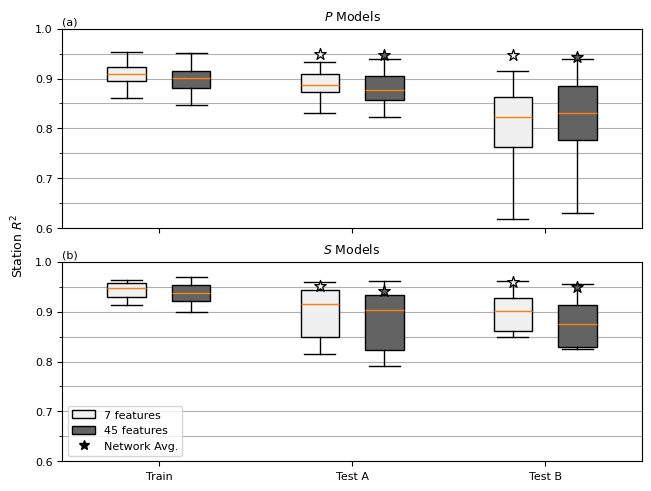

In [18]:
plotting.r2_boxplots(boxplots_dict, scatter_dict, label_dict, 
            xtick_locs=[0, 0.75, 1.5],
            xlims=[-0.25, 2])

In [19]:
print(p_all_results[p_all_results['holdout_r2'] > 0]['holdout_r2'].min())
p_all_results[['train_r2', 'test_r2', 'holdout_r2']].describe().loc[['min', 'max', '50%']]

0.599


,train_r2,test_r2,holdout_r2
min,0.794,0.758,-3.616
max,0.951,0.939,0.940
50%,0.901,0.878,0.830


In [20]:
print(s_all_results[s_all_results['holdout_r2'] > 0]['holdout_r2'].min())
s_all_results[['train_r2', 'test_r2', 'holdout_r2']].describe().loc[['min', 'max', '50%']]

0.138


,train_r2,test_r2,holdout_r2
min,0.8580,0.7920,-0.443
max,0.9690,0.9610,0.955
50%,0.9365,0.9035,0.875


In [21]:
print(p_sub_results[p_sub_results['holdout_r2'] > 0]['holdout_r2'].min())
p_sub_results[['train_r2', 'test_r2', 'holdout_r2']].describe().loc[['min', 'max', '50%']]

0.618


,train_r2,test_r2,holdout_r2
min,0.817,0.766,-3.866
max,0.954,0.934,0.916
50%,0.909,0.887,0.822


In [22]:
print(s_sub_results[s_sub_results['holdout_r2'] > 0]['holdout_r2'].min())
s_sub_results[['train_r2', 'test_r2', 'holdout_r2']].describe().loc[['min', 'max', '50%']]

0.66


,train_r2,test_r2,holdout_r2
min,0.857,0.8160,-0.982
max,0.964,0.9590,0.961
50%,0.948,0.9155,0.902


## Add YP21 station $R^2$ into plots

In [23]:
p_ypml_test_r2_vals = ypml_amps[ypml_amps['Evid'].isin(p_test_evids)].groupby('Sta').apply(lambda x: r2_score(x['Event-Mean-YPML-S'], x['Station-YPML-S'])).dropna()
p_ypml_2023_r2_vals = ypml_amps[ypml_amps['Evid'].isin(p_2023_evids)].groupby('Sta').apply(lambda x: r2_score(x['Event-Mean-YPML-S'], x['Station-YPML-S'])).dropna()
p_ypml_train_r2_vals = ypml_amps[ypml_amps['Evid'].isin(p_train_evids)].groupby('Sta').apply(lambda x: r2_score(x['Event-Mean-YPML-S'], x['Station-YPML-S'])).dropna()

s_ypml_test_r2_vals = ypml_amps[ypml_amps['Evid'].isin(s_test_evids)].groupby('Sta').apply(lambda x: r2_score(x['Event-Mean-YPML-S'], x['Station-YPML-S'])).dropna()
s_ypml_2023_r2_vals = ypml_amps[ypml_amps['Evid'].isin(s_2023_evids)].groupby('Sta').apply(lambda x: r2_score(x['Event-Mean-YPML-S'], x['Station-YPML-S'])).dropna()
s_ypml_train_r2_vals = ypml_amps[ypml_amps['Evid'].isin(s_train_evids)].groupby('Sta').apply(lambda x: r2_score(x['Event-Mean-YPML-S'], x['Station-YPML-S'])).dropna()


/uufs/chpc.utah.edu/common/home/u1072028/software/pkg/miniconda3/envs/featmags/lib/python3.11/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/uufs/chpc.utah.edu/common/home/u1072028/software/pkg/miniconda3/envs/featmags/lib/python3.11/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


In [24]:
ypml_p_r2_results = pd.concat([p_ypml_train_r2_vals, p_ypml_test_r2_vals, p_ypml_2023_r2_vals], axis=1).reset_index().dropna()
ypml_p_r2_results.columns = ['station', 'train_r2', 'test_r2', 'holdout_r2']
ypml_p_r2_results

,station,train_r2,test_r2,holdout_r2
0,AHID,0.335074,0.324362,0.383105
1,BOZ,0.809338,0.805967,0.776239
2,BW06,0.438596,0.437123,0.698975
3,LKWY,0.926772,0.929881,0.958450
5,YFT,0.923349,0.932485,0.894205
6,YHB,0.883897,0.875645,0.922395
7,YMR,0.941443,0.942105,0.917991
8,YNR,0.934513,0.935353,0.939594
9,YUF,0.913129,0.907882,0.859210


In [25]:
ypml_p_r2_results.describe().loc[['min', 'max', '50%']]

,train_r2,test_r2,holdout_r2
min,0.335074,0.324362,0.383105
max,0.941443,0.942105,0.958450
50%,0.913129,0.907882,0.894205


In [26]:
ypml_s_r2_results = pd.concat([s_ypml_train_r2_vals, s_ypml_test_r2_vals, s_ypml_2023_r2_vals], axis=1).reset_index().dropna()
ypml_s_r2_results.columns = ['station', 'train_r2', 'test_r2', 'holdout_r2']
ypml_s_r2_results

,station,train_r2,test_r2,holdout_r2
0,AHID,0.369435,0.444903,0.472091
1,BOZ,0.834469,0.840915,0.765798
2,BW06,0.382908,0.548918,0.731446
3,LKWY,0.930386,0.926438,0.932626
5,YFT,0.921479,0.931288,0.893660
6,YHB,0.882384,0.873543,0.921492
7,YMR,0.939299,0.940581,0.916493
8,YNR,0.932619,0.931816,0.939057
9,YUF,0.910923,0.906943,0.866302


In [27]:
ypml_s_r2_results.describe().loc[['min', 'max', '50%']]

,train_r2,test_r2,holdout_r2
min,0.369435,0.444903,0.472091
max,0.939299,0.940581,0.939057
50%,0.910923,0.906943,0.893660


In [28]:
boxplots_dict = {'sub_results':{'P':p_sub_results, 'S':s_sub_results},
                'all_results':{'P':p_all_results, 'S':s_all_results},
                'yp21_stat_results':{'P':ypml_p_r2_results, 'S':ypml_s_r2_results},
                    }

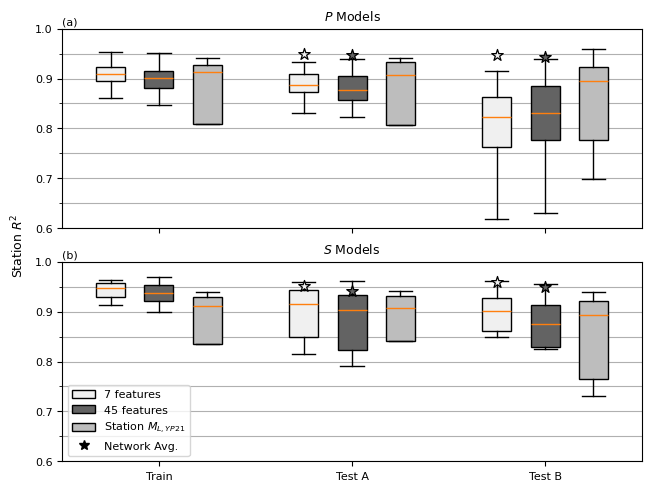

In [ ]:
plotting.r2_boxplots(boxplots_dict, scatter_dict, label_dict,
                     savefigname='../../figures/r2_summary_boxplots.png')

In [30]:
ypml_amps[ypml_amps.Evid.isin(s_2023_evids)].value_counts('Sta')

Sta
YMR     412
YHB     314
YNR     214
YUF     181
YFT     135
BOZ      51
AHID     26
LKWY     17
BW06     16
Name: count, dtype: int64

In [31]:
s_2023_df.value_counts('station')

station
YHB     225
YMR     172
YMC     171
YUF     118
YHH     113
YNR      99
YDD      82
YFT      55
YTP      49
YHL      39
YPP      35
FLWY     12
YML       7
YNM       6
LKWY      2
Name: count, dtype: int64